# House Prices 

Link to Kaggle page: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

In [70]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [40]:
#read csv
df = pd.read_csv("train_house_prices.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## EDA for the most important commom features 

##### GrLivArea: Above grade (ground) living area square feet

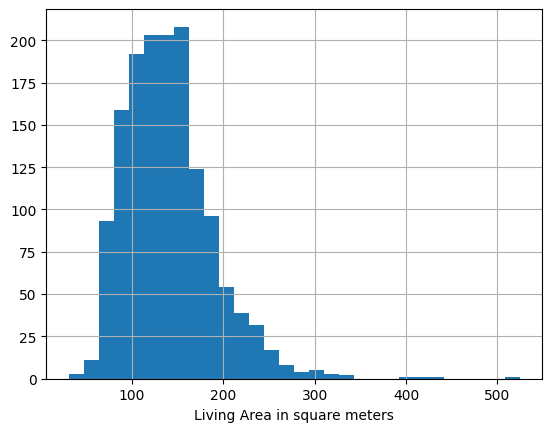

In [41]:
# From square feets to square meters
df["GrLivArea"] = round(df["GrLivArea"] * 0.092903, 2)

df["GrLivArea"].hist(bins=30)
plt.xlabel('Living Area in square meters');

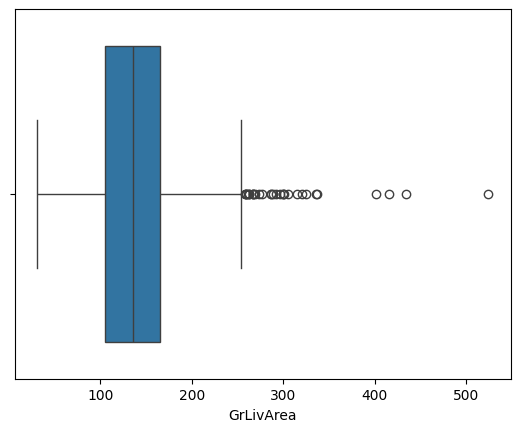

In [42]:
sns.boxplot(x=df["GrLivArea"]);

We have outliers, but only from one side. Though we can use some models that aren't effected by outliers, at this project we just remove top 1%.

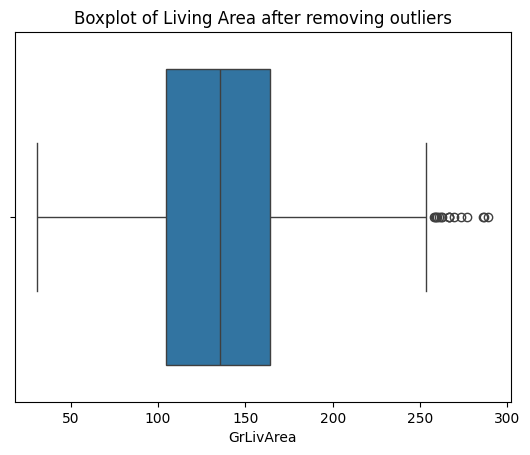

In [43]:
high = df["GrLivArea"].quantile(0.99)
df = df[df["GrLivArea"] <= high]
sns.boxplot(x=df["GrLivArea"])
plt.title('Boxplot of Living Area after removing outliers');

##### YearBuilt: Original construction date

In [47]:
df["YearBuilt"].describe()

count    1445.000000
mean     1971.285813
std        30.031228
min      1872.000000
25%      1954.000000
50%      1972.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

If we assume that dataset was valid in 2011, we can transform data in this way: age = 2010 - YearBuilt.

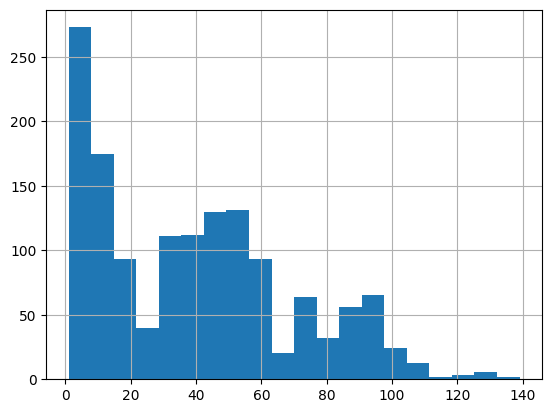

In [51]:
df["age"] = 2011 - df["YearBuilt"]
df["age"].hist(bins=20);

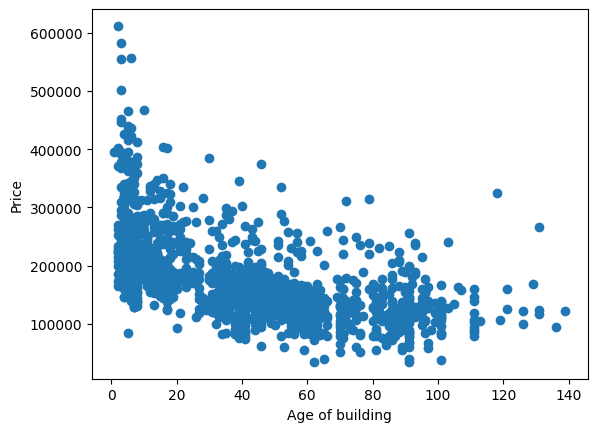

In [55]:
plt.scatter(df["age"], df["SalePrice"])
plt.xlabel("Age of building")
plt.ylabel("Price");

In [56]:
df["age"].corr(df["SalePrice"])

-0.5658533087733612

##### OverallCond: Rates the overall condition of the house

In [58]:
df["OverallCond"].corr(df["SalePrice"])

-0.09512264128729958

Though correlation is not strong, we can use it to improve our predictability.

Let's try to build model with only two features.

In [76]:
target = ["SalePrice"]
features = ["GrLivArea", "age", "OverallCond"]
X = df[features]
y = df[target]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Before we train our linear model we should build a baseline model.

In [78]:
y_base = y_train.mean()
y_base

SalePrice    178959.613322
dtype: float64

In [79]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [80]:
mse_base = mean_squared_error(y_test, [y_base] * len(y_test))
mse_linear = mean_squared_error(y_test, y_pred)
mse_linear / mse_base

0.3208512990343764

In [81]:
y_test.describe()

,SalePrice
count,289.000000
mean,176141.117647
std,82912.591988
min,35311.000000
25%,128000.000000
50%,152000.000000
75%,207000.000000
max,611657.000000


In [82]:
mse_linear ** 0.5

46910.641119608044

#### With just two parameters known our model can predict price! But our estimations are far from truth...